# JAX Field of Junctions Demo

In [1]:
from etils.lazy_imports import *
from types import SimpleNamespace

from scenic.projects.boundary_attention.field_of_junctions_jax import field_of_junctions
from scenic.projects.boundary_attention.field_of_junctions_jax import foj_helpers

(-0.5, 47.5, 47.5, -0.5)

(-0.5, 47.5, 47.5, -0.5)

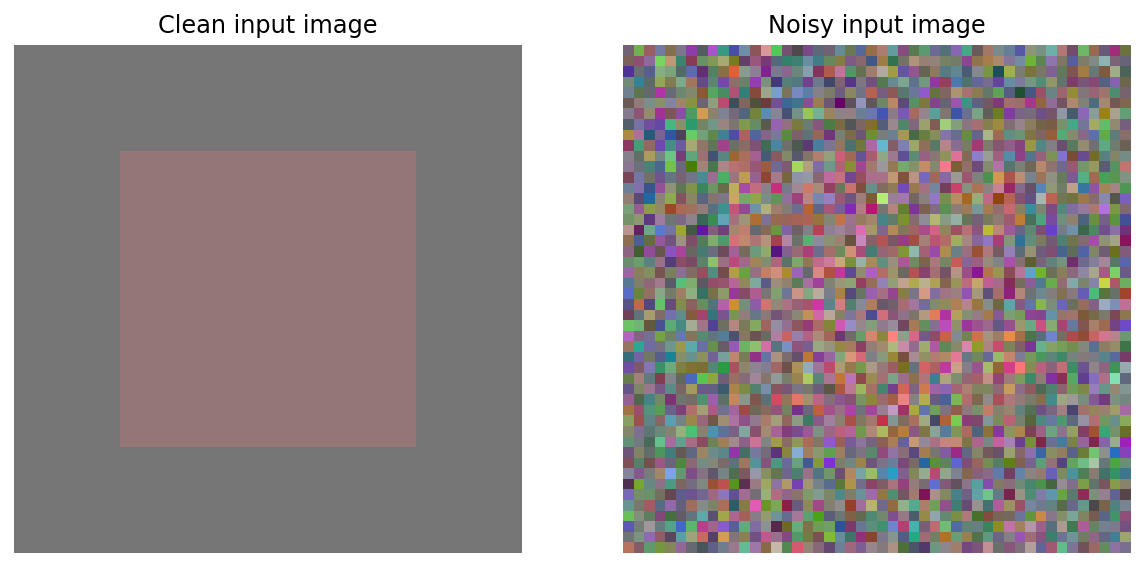

In [5]:
# Red square on black background
clean_img = jnp.zeros((48, 48, 3), dtype=jnp.float32)
clean_img = clean_img.at[10:-10, 10:-10, 0].set(1)

# Add noise
img = clean_img + jax.random.normal(jax.random.PRNGKey(0), shape=clean_img.shape)
mn, mx = img.min(), img.max()

# Adjust contrast (equally to both images)
img = (img - mn) / (mx - mn)
clean_img = (clean_img - mn) / (mx - mn)

plt.figure(figsize=[10, 10])
plt.subplot(121)
plt.imshow(clean_img)
plt.title('Clean input image')
plt.axis('off');
plt.subplot(122)
plt.imshow(img)
plt.title('Noisy input image')
plt.axis('off');

Beginning initialization...
Initialization iteration 0/30
Initialization iteration 5/30
Initialization iteration 10/30
Initialization iteration 15/30
Initialization iteration 20/30
Initialization iteration 25/30
Initialization done. Beginning refinement...
Refinement iteration 100/1000
Refinement iteration 200/1000
Refinement iteration 300/1000
Refinement iteration 400/1000
Refinement iteration 500/1000
Refinement iteration 600/1000
Refinement iteration 700/1000
Refinement iteration 800/1000
Refinement iteration 900/1000
Refinement iteration 1000/1000


(-0.5, 47.5, 47.5, -0.5)

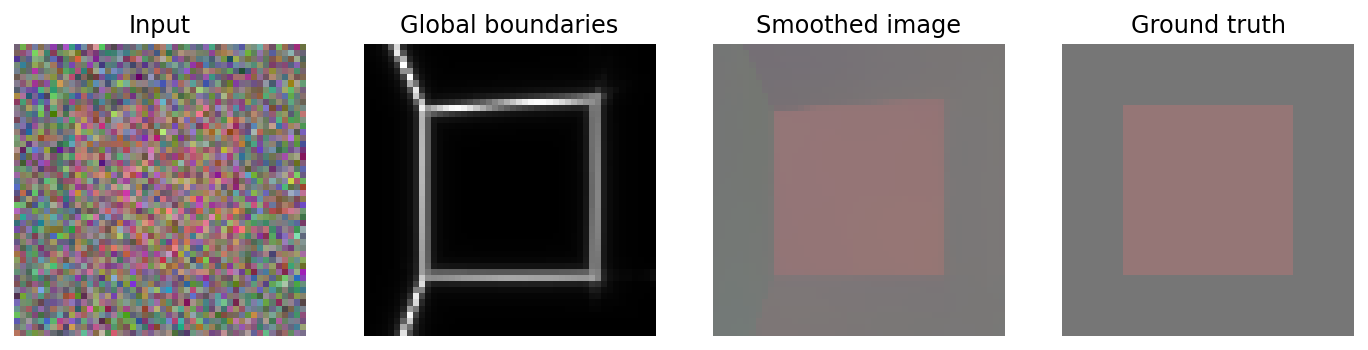

In [10]:
opts = foj_helpers.get_opts()

angles, x0y0, global_image, global_boundaries = foj_helpers.foj_optimize_verbose(img, opts)

plt.figure(figsize=[12, 12])
plt.subplot(141)
plt.imshow(img)
plt.title('Input')
plt.axis('off')
plt.subplot(142)
plt.imshow(global_boundaries.squeeze(), cmap='gray')
plt.title('Global boundaries')
plt.axis('off')
plt.subplot(143)
plt.imshow(global_image.squeeze().transpose(1, 2, 0))
plt.title('Smoothed image')
plt.axis('off')
plt.subplot(144)
plt.imshow(clean_img)
plt.title('Ground truth')
plt.axis('off');